<a href="https://colab.research.google.com/github/hannahkates/nyu-python-public-policy/blob/master/hw_6_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYU Wagner - Python Coding for Public Policy**
# Solutions to HW 6: Dates and time series

## Importing necessary packages

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **Problem Statement**:
Some 311 complaint types have interesting trends over time. Some are more prevalent at certain times of day, days of the week, seasons, etc. In this homework you will isolate the 10 most common complaint types and look at trends in when they occur.

**Step 1**. Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called `top_10`.

In [0]:
top_10 = df.groupby('complaint_type').size().nlargest(10).reset_index(name='count_complaints')
top_10 = top_10.complaint_type
top_10

0                    Noise - Residential
1                         HEAT/HOT WATER
2                        Illegal Parking
3    Request Large Bulky Item Collection
4                       Blocked Driveway
5                Noise - Street/Sidewalk
6                       Street Condition
7                   UNSANITARY CONDITION
8                           Water System
9                                  Noise
Name: complaint_type, dtype: object

**Step 2**. Filter the 311 dataset to only 311 requests that have complaint types in `top_10`. Save this subset of data as a dataframe called `filtered_311`.


In [0]:
requests_in_top_10 = df[df.complaint_type.isin(top_10)]

In [0]:
requests_in_top_10.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,08/01/2018 12:01:09 AM,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,08/01/2018 12:01:10 AM,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0


**Step 3**. Convert the `created_date` column in `filtered_311` to be a datetime series.

In [0]:
# if you don't provide the format string, it will take much longer to convert
# %I indicates that it's using a 12hr clock with AM and PM

requests_in_top_10.created_date = pd.to_datetime(requests_in_top_10.created_date, format='%m/%d/%Y %I:%M:%S %p')
requests_in_top_10.closed_date = pd.to_datetime(requests_in_top_10.closed_date, format='%m/%d/%Y %I:%M:%S %p')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Step 4**. Create 6 new columns in `filtered_311` that extract each of the following from `created_date`
* year
* date
* month
* weekday
* weekday_name
* hour

In [0]:
# Add columns with date, month, weekday name, and hour using .dt.

requests_in_top_10['year'] = requests_in_top_10.created_date.dt.year
requests_in_top_10['date'] = requests_in_top_10.created_date.dt.date
requests_in_top_10['month'] = requests_in_top_10.created_date.dt.month
requests_in_top_10['weekday_name'] = requests_in_top_10.created_date.dt.weekday_name
requests_in_top_10['weekday'] = requests_in_top_10.created_date.dt.weekday
requests_in_top_10['hour'] = requests_in_top_10.created_date.dt.hour

requests_in_top_10.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
2,2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,3,3,39894246,2018-08-01 00:01:00,2018-08-02 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,4,4,39881329,2018-08-01 00:01:00,2018-08-05 00:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0
5,5,5,39882413,2018-08-01 00:01:09,2018-08-01 02:08:54,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,Wednesday,2,0
6,6,6,39884833,2018-08-01 00:01:10,2018-08-05 01:10:41,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,Wednesday,2,0


**Step 5. Trends by hour**

Find the count of 311 requests per hour and date for each complaint type: 

* A. Find the count of 311 requests per hour and date for each complaint type:   
 * Hint: Use the pandas groupby function to aggregate the `filtered_311` dataframe by hour, date, and complaint_type and count the number of 311 requests. Save the result as a new dataframe.

* B. Find the median count of 311 requests per hour for each complaint type:
 * Hint: Group the new dataframe from Step A by hour and complaint type, getting the median of the counts across all the dates in each group. Save the result as a new dataframe.

* C. Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. The x values will be hours and the y values will be the median count of requests per complaint type. Use a for loop to produce the 10 lines all one one figure. The final chart should look similar to this:

![Count of complaints per hour](https://raw.githubusercontent.com/hannahkates/nyu-python-public-policy/master/picsfornotebooks/311%20complaints%20per%20hour.png)


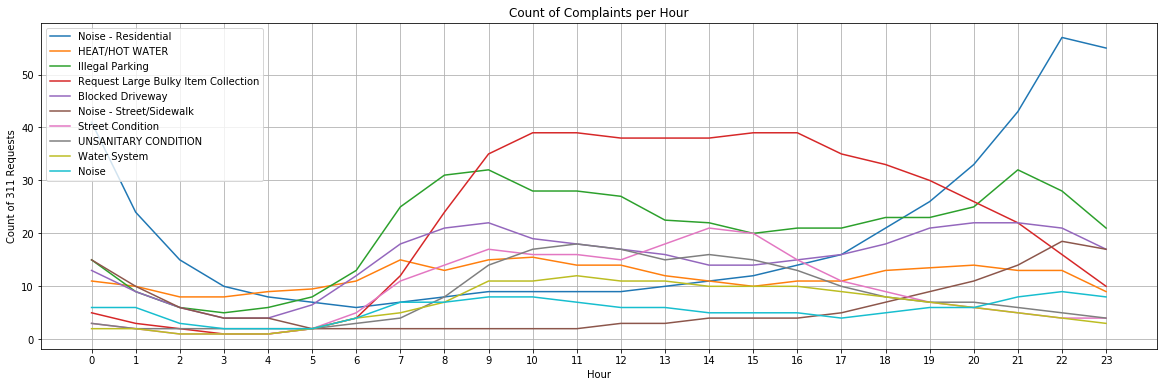

In [0]:
# A
complaint_per_date_hour = requests_in_top_10[['date', 'hour', 'complaint_type']].groupby(['date', 'hour', 'complaint_type']).size().reset_index(name='count_requests')

plt.figure(figsize=(20, 6))

# B and C
for c_type in top_10:
  complaint_hour = complaint_per_date_hour[complaint_per_date_hour.complaint_type == c_type].groupby('hour')['count_requests'].median().reset_index(name='median_requests')
  plt.plot(complaint_hour.hour, complaint_hour.median_requests, label=c_type)

plt.xticks(complaint_hour.hour)
plt.grid()
plt.title('Count of Complaints per Hour')
plt.xlabel('Hour')
plt.ylabel('Count of 311 Requests')
plt.legend()

**Step 6. Trends by day of week**

Reproduce the steps in 5, but this time aggregate by **weekday**, date, and complaint_type. Produce a similar plot where the x values will be the days of the week and the y values will be the median count of requests per complaint type

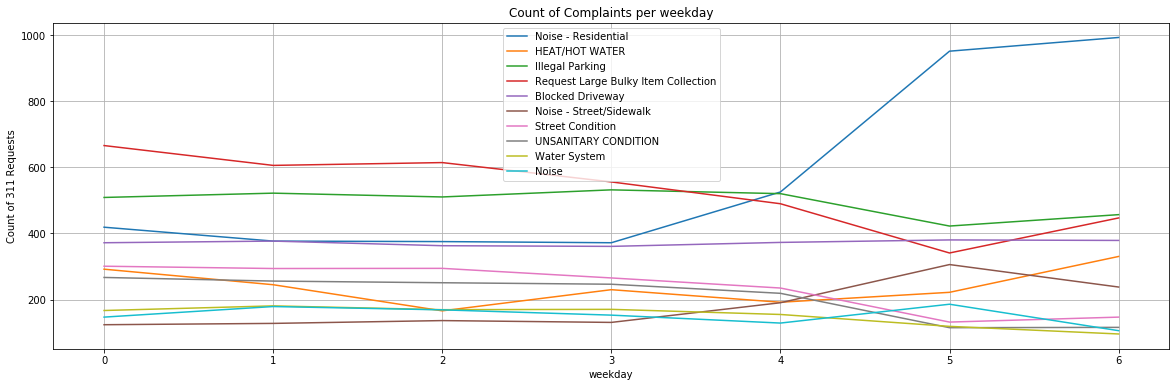

In [0]:
complaint_per_date_weekday = requests_in_top_10[['date', 'weekday', 'complaint_type']].groupby(['date', 'weekday', 'complaint_type']).size().reset_index(name='count_requests')

plt.figure(figsize=(20, 6))

for c_type in top_10:
  complaint_weekday = complaint_per_date_weekday[complaint_per_date_weekday.complaint_type == c_type].groupby('weekday')['count_requests'].median().reset_index(name='median_requests')
  plt.plot(complaint_weekday.weekday, complaint_weekday.median_requests, label=c_type)

plt.xticks(complaint_weekday.weekday)
plt.grid()
plt.title('Count of Complaints per weekday')
plt.xlabel('weekday')
plt.ylabel('Count of 311 Requests')
plt.legend()

**Step 7. Trends by month**

Reproduce the steps in 5, but this time aggregate by **month, year** (not date), and complaint_type. Produce a similar plot where x values will be month and y values will be the median count of requests per complaint type

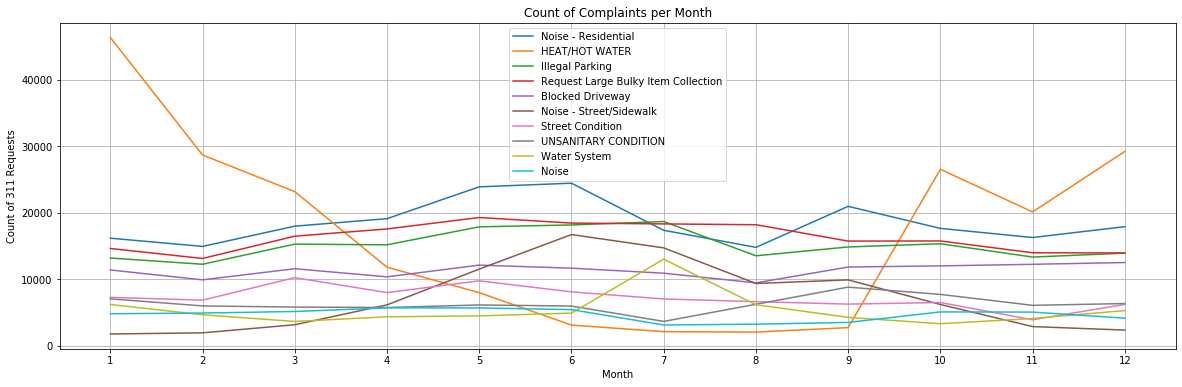

In [0]:
complaint_per_year_month = requests_in_top_10[['year', 'month', 'complaint_type']].groupby(['year', 'month', 'complaint_type']).size().reset_index(name='count_requests')

plt.figure(figsize=(20, 6))

for c_type in top_10:
  complaint_month = complaint_per_year_month[complaint_per_year_month.complaint_type == c_type].groupby('month')['count_requests'].median().reset_index(name='median_requests')
  plt.plot(complaint_month.month, complaint_month.median_requests, label=c_type)

plt.xticks(complaint_month.month)
plt.grid()
plt.title('Count of Complaints per Month')
plt.xlabel('Month')
plt.ylabel('Count of 311 Requests')
plt.legend()

**Step 8**. Write a few sentences with your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.